In [3]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

df = pd.read_csv("C:\\Pavans\\#{ML-DL}\\datasets\\train.csv") #Reading the dataset using Pandas
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df.groupby(['Gender'])['LoanAmount'].sum()

Gender
Female    13810.0
Male      70155.0
Name: LoanAmount, dtype: float64

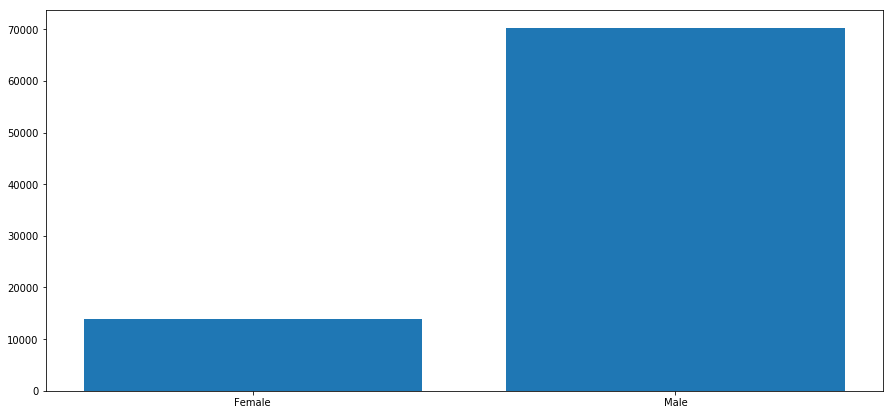

In [17]:
dict = {}

fig, ax = plot.subplots(figsize=(15,7))
grouped = df.groupby(['Gender'])
for gender,group in grouped:
    dict[gender] = group['LoanAmount'].sum()
    
width = 15
height = 5

plot.bar(range(len(dict)), list(dict.values()))
plot.xticks(range(len(dict)), list(dict.keys()))
plot.show()

In [27]:
df.groupby(['Gender','Married','Property_Area']).count()

Loan_ID  Dependents  Education  Self_Employed  \
Gender Married Property_Area                                                  
Female No      Rural               19          19         19             18   
               Semiurban           34          34         34             31   
               Urban               27          25         27             25   
       Yes     Rural                5           5          5              5   
               Semiurban           20          20         20             18   
               Urban                6           6          6              6   
Male   No      Rural               44          44         44             41   
               Semiurban           44          43         44             42   
               Urban               42          41         42             39   
       Yes     Rural              107         105        107            101   
               Semiurban          127         124        127            124   
               Urban              123         120        123            116   

                              ApplicantIncome  CoapplicantIncome  LoanAmount  \
Gender Married Property_Area                                                   
Female No      Rural                       19                 19          19   
               Semiurban                   34                 34          33   
               Urban                       27                 27          26   
       Yes     Rural                        5                  5           5   
               Semiurban                   20                 20          20   
               Urban                        6                  6           6   
Male   No      Rural                       44                 44          43   
               Semiurban                   44                 44          43   
               Urban                       42                 42          39   
       Yes     Rural                      107                107         102   
               Semiurban                  127                127         125   
               Urban                      123                123         116   

                              Loan_Amount_Term  Credit_History  Loan_Status  
Gender Married Property_Area                                                 
Female No      Rural                        19              17           19  
               Semiurban                    34              33           34  
               Urban                        24              23           27  
       Yes     Rural                         5               4            5  
               Semiurban                    20              17           20  
               Urban                         6               6            6  
Male   No      Rural                        42              43           44  
               Semiurban                    44              41           44  
               Urban                        42              39           42  
       Yes     Rural                       105              97          107  
               Semiurban                   124             119          127  
               Urban                       119             110          123

In [34]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

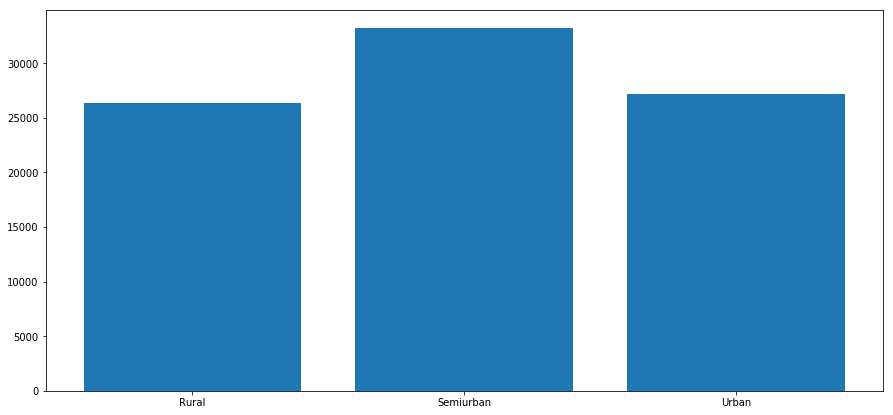

In [36]:
dict = {}

fig, ax = plot.subplots(figsize=(15,7))
grouped = df.groupby(['Property_Area'])
for Property_Area,group in grouped:
    dict[Property_Area] = group['LoanAmount'].sum()
    
width = 15
height = 5

plot.bar(range(len(dict)), list(dict.values()))
plot.xticks(range(len(dict)), list(dict.keys()))
plot.show()

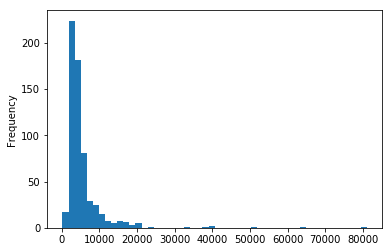

In [47]:
%matplotlib inline
plot.figure();
df['ApplicantIncome'].plot.hist(bins=50,stacked=True)

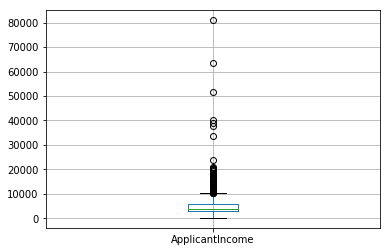

In [49]:
df.boxplot(column='ApplicantIncome')

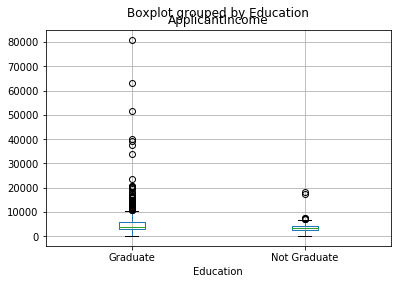

In [51]:
df.boxplot(column='ApplicantIncome', by = 'Education')

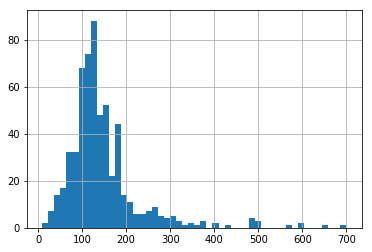

In [59]:
df['LoanAmount'].hist(bins=50)

In [61]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

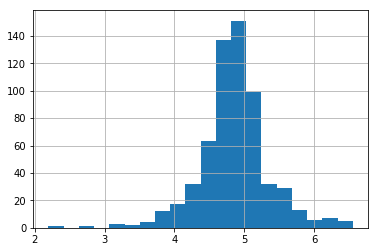

In [64]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)